In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['y'])

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.5)

X_train = X
y_train = y

#RandamForestの学習済みモデルを用意する。
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)

y_train.head()  # 1番目のデータの予測結果はsetosa

,y
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [2]:
shap.initjs()

# TreeExplainer

In [3]:
#SHAPのExplainerを用意する。ランダムフォレストなのでTreeExplainerを使う。
explainer = shap.TreeExplainer(model)
 

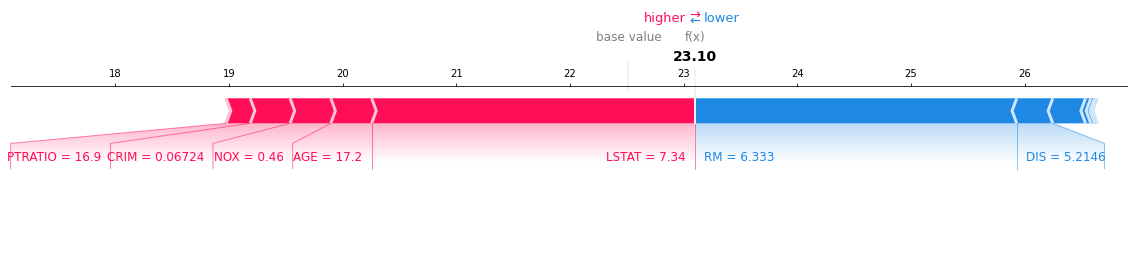

In [4]:
# 念のためインスタンス生成直後のこちらと、後半の結果を比較確認
shap_values = explainer.shap_values(X_test.loc[[329]])
#予測に使ったデータに対して出力とその要因について可視化する。
shap.force_plot(explainer.expected_value, 
                shap_values, 
                X_test.loc[[329]], 
                matplotlib=True,
                )

## summary_plot

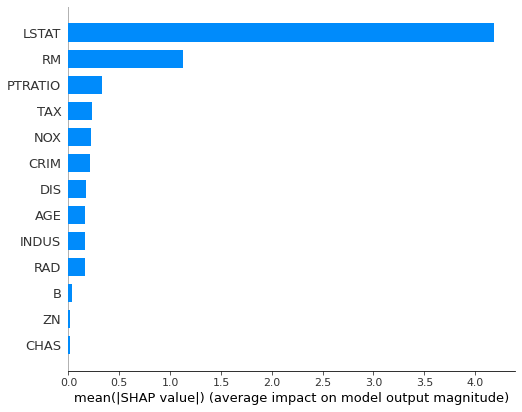

In [5]:
shap_values = explainer.shap_values(X_train.loc[[0]])
shap.summary_plot(shap_values, features=X_train, plot_type="bar")

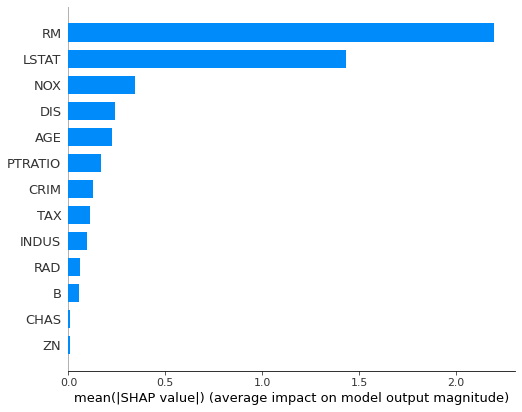

In [6]:
shap_values = explainer.shap_values(X_train.loc[[1]])
shap.summary_plot(shap_values, features=X_train, plot_type="bar")

# 画像保存

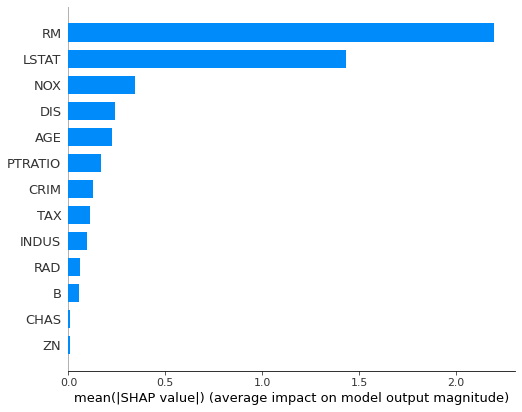

In [7]:
shap_values = explainer.shap_values(X_train.loc[[1]])
shap.summary_plot(shap_values, features=X_train, plot_type="bar", show=False)
plt.savefig('output.png')

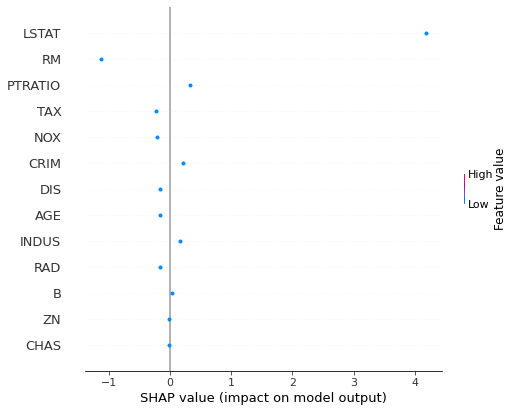

In [8]:
shap_values = explainer.shap_values(X_train.loc[[0]])
shap.summary_plot(shap_values, X_train.loc[[0]])

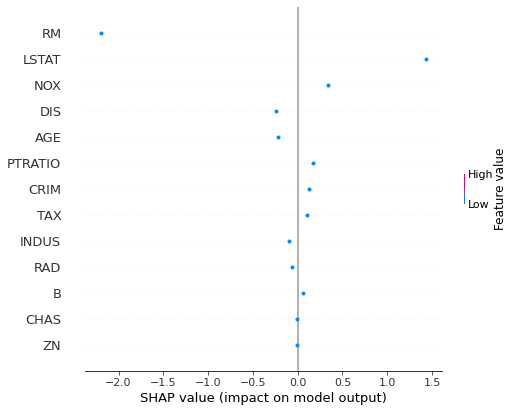

In [9]:
shap_values = explainer.shap_values(X_train.loc[[1]])
shap.summary_plot(shap_values, X_train.loc[[1]])

## force_plot

In [10]:
y_pred = model.predict(X_train.loc[[0]])
y_pred

array([25.331])

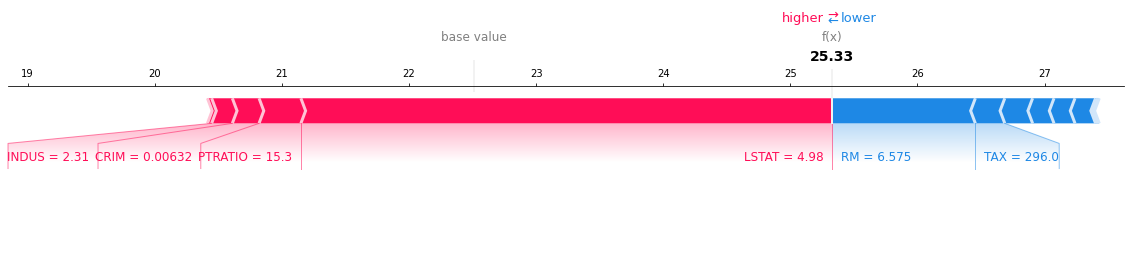

In [11]:
shap_values = explainer.shap_values(X_train.loc[[0]])
#予測に使ったデータに対して出力とその要因について可視化する。
shap.force_plot(explainer.expected_value, 
                shap_values, 
                X_train.loc[[0]], 
                matplotlib=True,
                )

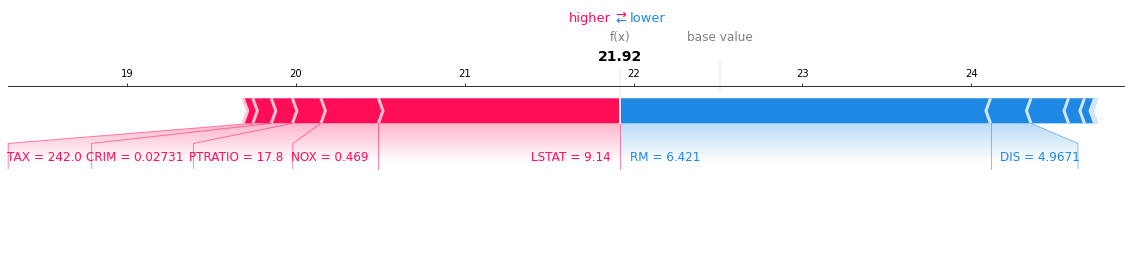

In [12]:
shap_values = explainer.shap_values(X_train.loc[[1]])
#予測に使ったデータに対して出力とその要因について可視化する。
shap.force_plot(explainer.expected_value, 
                shap_values, 
                X_train.loc[[1]], 
                matplotlib=True,
                )

In [13]:
X_test.loc[[329]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.46,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34


In [14]:
y_pred = model.predict(X_test.loc[[329]])
y_pred

array([23.098])

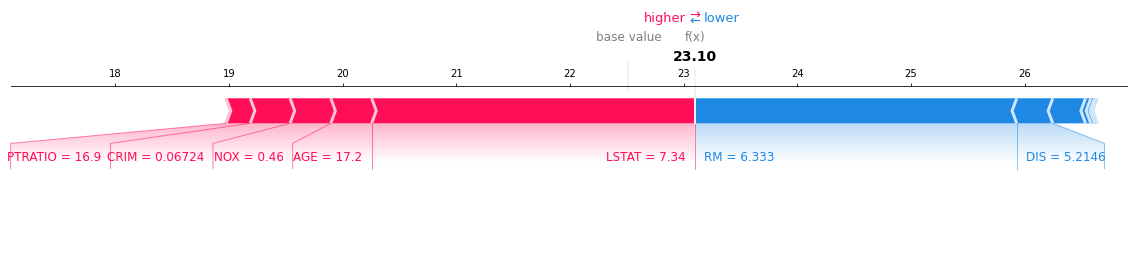

In [15]:
shap_values = explainer.shap_values(X_test.loc[[329]])
#予測に使ったデータに対して出力とその要因について可視化する。
shap.force_plot(explainer.expected_value, 
                shap_values, 
                X_test.loc[[329]], 
                matplotlib=True,
                )

# KernelExplainer

In [16]:
#SHAPのExplainerを用意する。SVCなのでKernelExplainerを使う。
explainer = shap.KernelExplainer(model.predict, X_train)


Using 506 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


## summary_plot

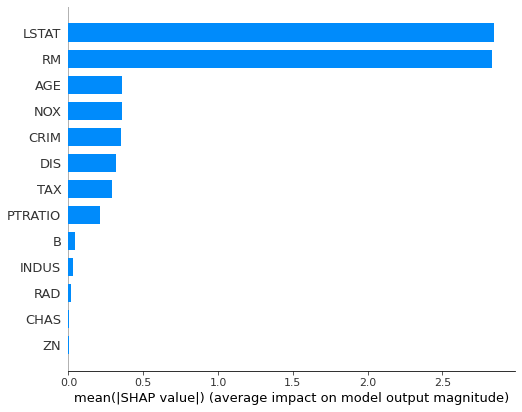

In [17]:
shap.summary_plot(shap_values, features=X_train, plot_type="bar")

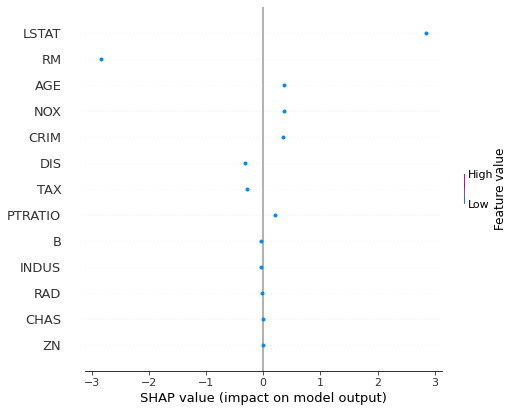

In [18]:
shap.summary_plot(shap_values, X_train.loc[[0]])

## force_plot

In [19]:
# shap_values = explainer.shap_values(X_train.loc[[0]])
# #予測に使ったデータに対して出力とその要因について可視化する。
# shap.force_plot(explainer.expected_value, 
#                 shap_values, 
#                 X_train.loc[[0]], 
#                 matplotlib=True,
#                 )

# 実行エラーのためコメントアウト


In [20]:
# shap_values = explainer.shap_values(X_train.loc[[1]])
# #予測に使ったデータに対して出力とその要因について可視化する。
# shap.force_plot(explainer.expected_value, 
#                 shap_values, 
#                 X_train.loc[[1]], 
#                 matplotlib=True,
#                 )

# 実行エラーのためコメントアウト